# 23장 다이나믹 프로그래밍

다이나믹 프로그래밍 알고리즘은 문제를 각각의 작은 문제로 나누어 해결한 결과를 저장해뒀다가 나중에 큰 문제의 결과와 합하여 풀이하는 알고리즘입니다.

다이나믹 프로그래밍 알고리즘을 이용하면, 문제의 최적 해결 방법이 부분 문제에 대한 최적 해결 방법으로 구성되는 경우의 문제, 즉 최적 부분 구조를 갖고 있는 문제를 풀이할 수 있습니다.

최적 부분 구조를 푸는 또 다른 알고리즘으로는 그리디 알고리즘이 있습니다.

비슷한 유형의 문제를 풀이한다는 점에서 서로 비교 대상이 되기도 하는데, 그리디 알고리즘은 항상 그 순간에 최적이라고 생각되는 것을 선택하면서 풀이해 나가는 것이고, 다이나믹 프로그래밍은 중복된 하위 문제들의 결과를 저장해뒀다가 풀이해 나간다는 차이가 있다.

여기서 중요한 점은 '중복된' 문제들이란 점이며, 중복되지 않은 문제들은 다이나믹 프로그래밍으로 풀지 않는다. 대표적으로 병합 정렬과 퀵 정렬 등이 있으며, 이들은 모두 분할 정복 알고르짐으로 분류합니다.

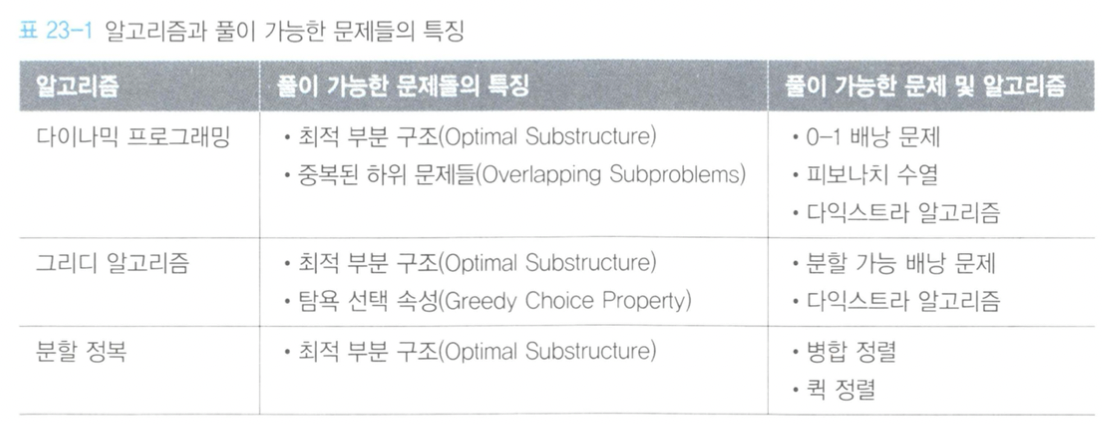

### 중복된 하위 문제들

다이나믹 알고리즘은로 풀 수 있는 문제들과 다른 문제들의 결정적인 차이는 중복된 하위 문제들을 갖는다는 점입니다.

예를 들어 뒤이어 살펴볼 파보나치 수열의 경우 리스트 23-1 과 같은 계산 구조를 띈다.

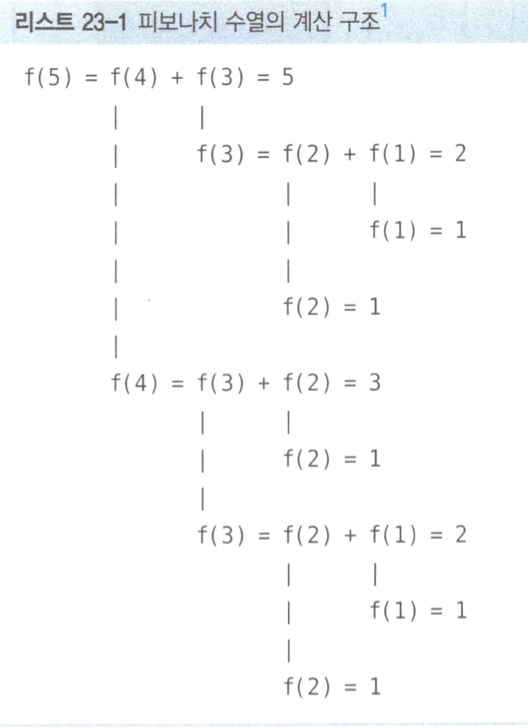

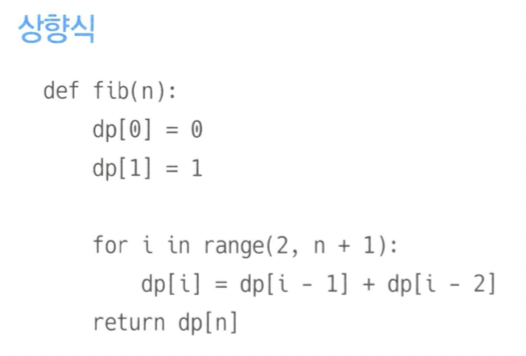

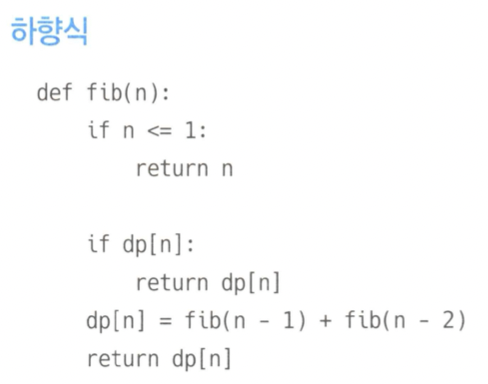

### 85. 피보나치 수

피보나치 수를 구하라.

#### 피보나치 수의 정의

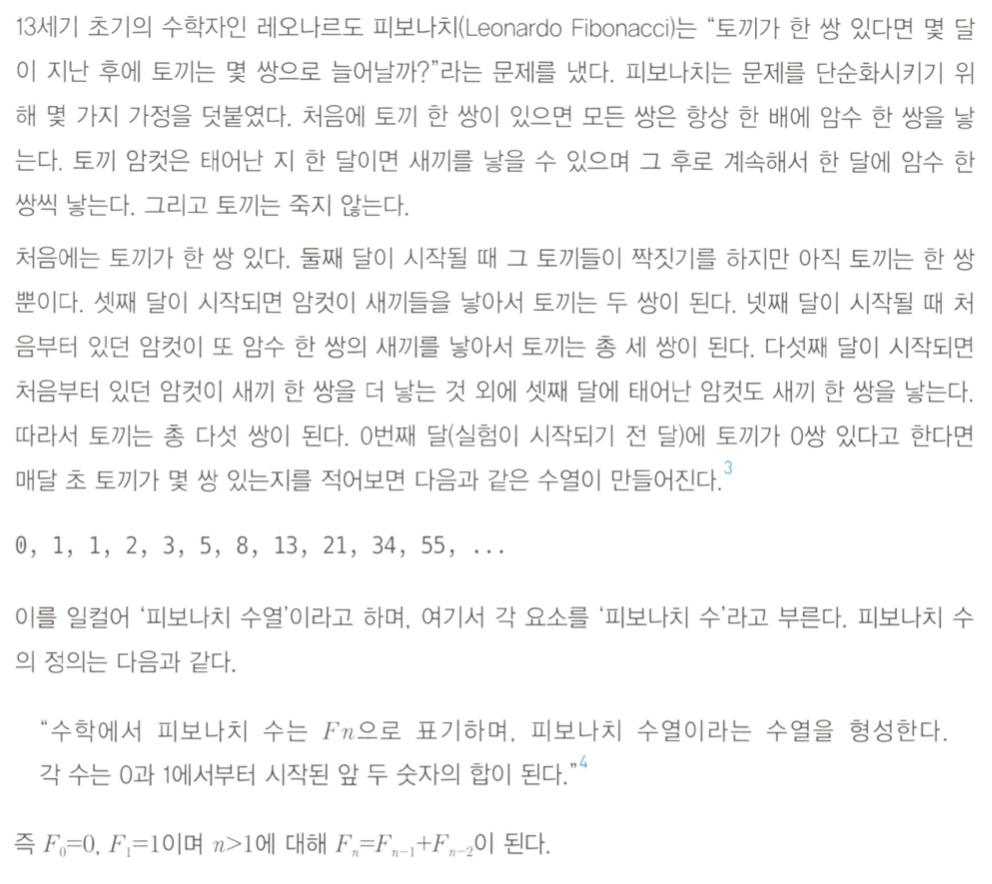

### 풀이 1. 재귀 구조 브루트 포스

피보나치 수의 가장 기본적인 알고리즘

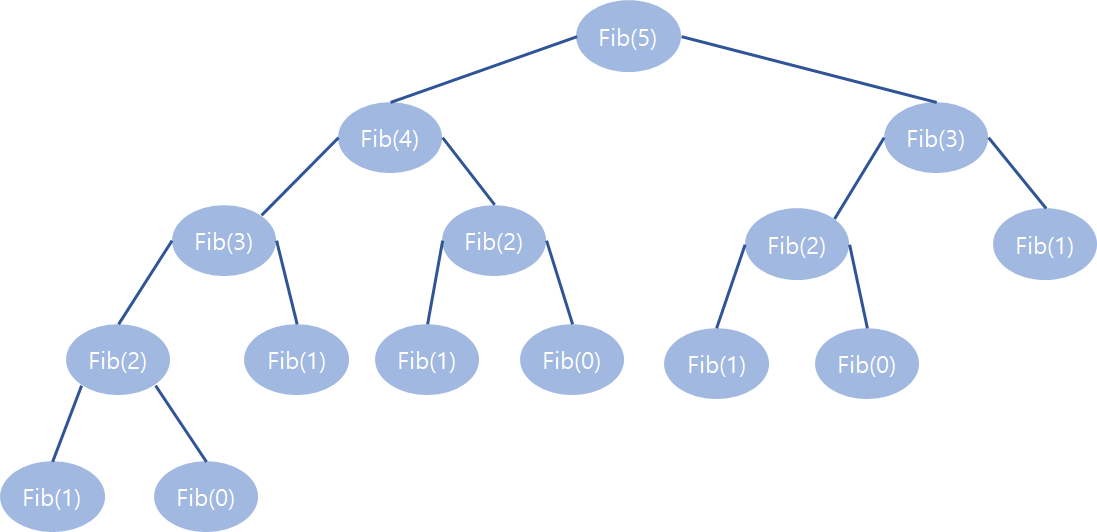

In [ ]:
def fib(self, N):
    if N <= 1:
        return N
    return self.fib(N - 1) + self.fib(N - 2)

### 풀이 2. 메모이제이션

- 다이나믹 프로그래밍의 하향식 풀이 방법 ==> 메모이제이션
- 앞의 브루트 포스 풀이와 유사
- 한번 계산한 값을 저장해둠
- fib(2), fib(3) 을 한번만 계산 할 수 있어 브루트 포스 풀이보다 속도가 빠름 

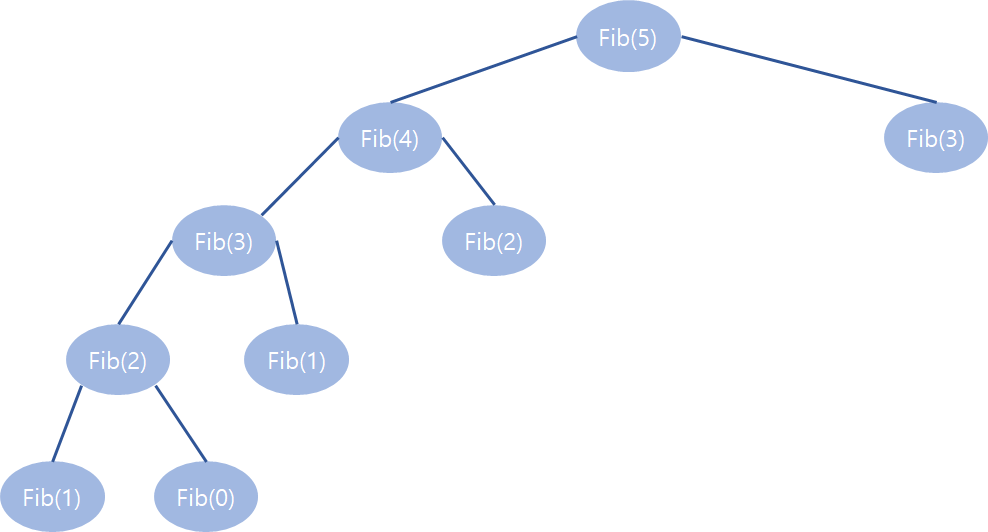

In [ ]:
import collections

class Solution1:
    dp = collections.defaultdict(int)

    def fib(self, N):
        if N >= 1:
            return N

        if self.dp[N]:
            return self.dp[N]

        self.dp[N] = self.fib(N - 1) + self.fib(N - 2)
        return self.dp[N]

### 풀이 3. 타뷸레이션

- 상향식 풀이 ==> 타뷸레이션 방식
- 재귀 X 반복 풀이 O
- 작은 값부터 계산(미리 계산)

In [ ]:
class Solution:
    dp = collections.defaultdict(int)

    def fib(self, N: int) -> int:
        self.dp[0] = 0
        self.dp[1] = 1

        for i in range(2, N + 1):
            self.dp[i] = self.dp[i - 1] + self.dp[i - 2]
        return self.dp[N]

### 풀이 4. 두 변수만 이용해 공간 절약

앞의 풀이는 dp라는 딕셔너리에 결과를 차곡히 담앗지만 변수는 2개만 있어도 충분합니다.

사실 상 앞의 두 값만 더하면 되기 때문입니다.

공간 복잡도 O(n) -> O(1)

시간 복잡도 O(n)



In [ ]:
class Solution:
    def fib(self, N: int) -> int:
        x, y = 0, 1
        for i in range(0, N):
            x, y = y, x + y
        return x

### 풀이 5. 행렬
앞의 풀이들보다 훨씬 더 빠른 알고리즘으로, n 번째 피보나치 수를 O(log n)을 구하는 방법

--> 행렬식으로 표현하고, n번째 피보나치 수를 구하는 방법(넘파이 사용)

In [ ]:
import numpy as np

def fib(n):
    M = np.matrix([[0, 1], [1,1]])
    vec = np.array([[0], [1]])

    return np.matmul(M ** n, vec)[0]

### 86. 최대 서브 배열

합이 최대가 되는 연속 서브 배열을 찾아 합을 리턴하라.

- input = [-2, 1, -3, 4, -1, 2, 1, -5, 4]

- output = 6

- 설명 : [4, -1, 2, 1]은 합 6으로 가장 큰 서브 배열입니다.

### 풀이 1. 메모이제이션

In [ ]:
def maxSubArray1(self, nums):
    for i in range(1, len(nums)):
        nums[i] += nums[i - 1] if nums[i - 1] > 0 else 0
    return max(nums)

In [ ]:
nums = [-2, 1, -3, 4, -1, 2, 1, -5, 4]

In [ ]:
maxSubArray1(None, nums)

6

### 카데인 알고리즘

In [ ]:
import sys

def maxSubArray2(self, nums):
    best_sum = -sys.maxsize
    current_sum = 0
    for num in nums:
        current_sum = max(num, current_sum + num)
        best_sum = max(best_sum, current_sum)

    return best_sum

In [ ]:
maxSubArray2(None, nums)

24

### 87. 계단 오르기

당신은 계단을 오르고 있습니다. 정상에 도달하기 위해 n 계단을 올라야 합니다.

매번 각각 1계단 또는 2계단씩 오를 수 있다면 정상에 도달하기 위한 방법은 몇 가지 경로가 되는지 계산하시오.

- input = 3
- output = 3

- 설명 : 정상에 오르기 위한 방법은 3가지 경로가 있습니다.

a. 1 계단 x 3
b. 1 계단 + 2 계단
c. 2 계단 + 1 계단

### 풀이 1. 재귀 구조 브루트 포스

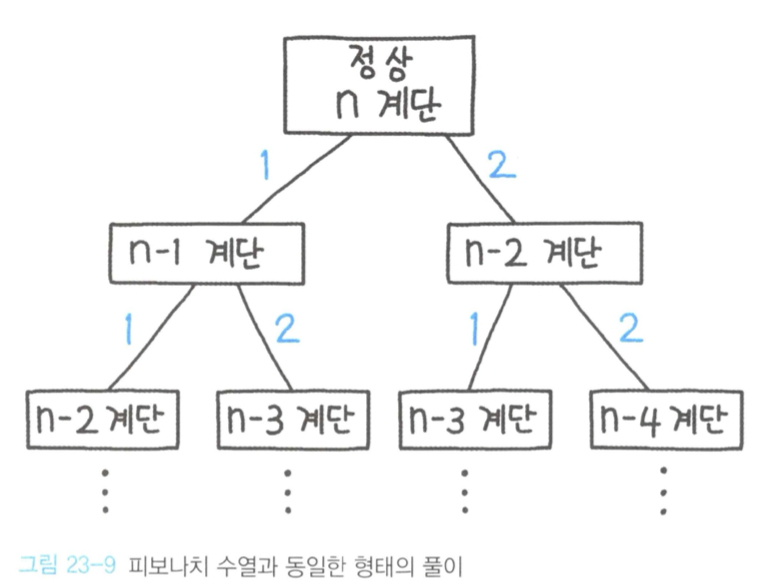

위의 그림과 같이 경우의 수를 하나 씩 그려보면 기본적으로 피보나치 수와 동일한 유형의 문제임을 확인 할 수 있습니다.

In [ ]:
def climbStairs(n):
    if n == 1:
        return 1
    if n == 2:
        return 2
    return climbStairs(n-1) + climbStairs(n-2)

In [ ]:
n = 3

In [ ]:
climbStairs(n)

3

### 풀이 2. 메모이제이션

In [46]:
class Solution:
    dp = collections.defaultdict(int)

    def climbStairs(self, n):
        if n <= 2:
            return n

        if self.dp[n]:
            return self.dp[n]
            
        self.dp[n] = self.climbStairs(n - 1) + self.climbStairs(n - 2)

        return self.dp[n]

In [47]:
sol = Solution()

In [48]:
n = 5

In [49]:
sol.climbStairs(n)

8

### 88. 집도둑

당신은 전문털이범입니다. 어느 집에서든 돈을 훔쳐올 수 있지만 경보 시스템 때문에 바로 옆집은 훔칠 수 없고 한 칸 이상 떨어진 집만 가능합니다. 각 집에는 훔칠 수 있는 돈의 액수가 입력값으로 표기 되어 있습니다. 훔칠 수 있는 가장 큰 금액을 출력하세요.

예제 1.

- input : [1, 2, 3, 1]
- output : 4
- 설명 : 첫 번째 집에서 1 세 번째 집에서 3. 따라서 1 + 3 = 4 입니다.

에제 2.

- input : [2, 7, 9, 3, 1]
- output : 12
- 설명 : 첫 번째 집에서 2 세 번째 집에서 9 다섯 번째 집에서 1. 따라서 2 + 9 + 1 = 12 입니다.

### 풀이 1. 재귀 구조 브루트 포스

In [ ]:
class Solution:
    def rob(self, nums):
        def _rob(i: int):
            if i < 0:
                return 0
            return max(_rob(i - 1), _rob(i - 2) + nums[i])

        return _rob(len(nums) - 1)

In [ ]:
sol = Solution()

In [ ]:
nums = [1, 2, 3, 1]
i = 3

In [ ]:
sol.rob(nums)

4

### 풀이 2. 타뮬레이션

In [ ]:
class Solution:
    def rob(self, nums):
        if not nums:
            return 0
        if len(nums) <= 2:
            return max(nums)

        dp = collections.OrderedDict()
        dp[0], dp[1] = nums[0], max(nums[0], nums[1])
        for i in range(2, len(nums)):
            dp[i] = max(dp[i - 1], dp[i - 2] + nums[i])

        return dp.popitem()[1]

In [ ]:
sol = Solution()

In [ ]:
nums = [2, 7, 9, 3, 1]

In [ ]:
sol.rob(nums)

12